**Langkah 1-Import Library**

In [1]:
# Melakukan Import Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Langkah 2-Load Data dan visualisasi**

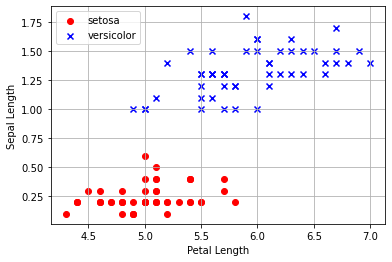

In [2]:
# Membaca data
df = pd.read_csv('iris.csv', header=None)

# Membagi dataset menjadi 3 subset
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

# Mendefinisikan  variabel a, b dengan nilai 0, 3 yang difungsikan sebagai fungsi x dan y dalam scatter plot
a, b = 0, 3
# Membuat scatter plot menggunakan sumbu x dan y dengan titik o berwarna merah
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
# Membuat scatter plot menggunakan sumbu x dan y dengen titik x berwarna biru
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Memberi label pada scatter plot sumbu x dan y 
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
# Memberi label penjelasan warna dan label 
plt.legend(loc='upper left')
# Menambahkan grid pada scatter plot
plt.grid()
# Menampilkan plot
plt.show()

**Langkah 3 - Membuat Kelas Perceptron**

In [5]:
# Melakukan inisialisai pada objek untuk mengontrol kecepatan Perceptron dan jumlah epoch yang akan digunakan
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    # Melatih model x dan y
    def fit(self, X, y):
        
        # Menginisialisasi bobot dengan nilai 0
        self.w_ = np.zeros(1 + X.shape[1])
        # Menyimpan data jumlah kesalahan klasifikasi
        self.errors_ = []
        
        # Melakukan prediksi
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # Menghitung hasil perkalian 
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Melakukan prediksi berdasarkan hasil yang telah dihitung oleh metode 'net_input' untuk menampilkan input yang jika lebih besar atau sama dengan 0, maka model memprediksi kelas 1, dan sebaliknya model memprediksi kelas -1
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4-Pilih Data dan Encoding label**

In [6]:
# pilih 100 data awal
y = df.iloc[0:100, 4].values 
# ganti coding label
y = np.where(y == 'Iris-setosa', -1, 1) 
# slice data latih
X = df.iloc[0:100, [0, 3]].values 

**Langkah 5-Fitting Model**

In [7]:
# Membuat objek dengan menginisialisasi parameter untuk mengukur kecepatan 
ppn = Perceptron(eta=0.1, n_iter=10)
# Melatih model untuk melakukan prediksi berdasarkan data
ppn.fit(X, y)

**Langkah 6-Visualisasi Nilai Eror Per Epoch**

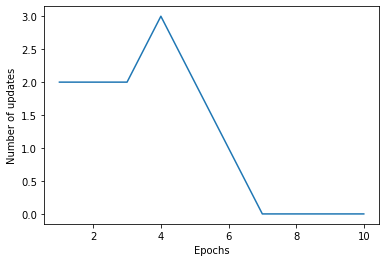

In [8]:
# Membuat garis plot dari sumbu x dan y
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
# Memberi label pada sumbu x
plt.xlabel('Epochs')
# Memberi label pada sumbu y
plt.ylabel('Number of updates')
# Menampilkan plot
plt.show()

**Langkah 7-Visualisasi Decision Boundary**

In [9]:
# Membuat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Mengatur generator penanda dan peta warna
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Wilayah plot  keputusan dengan membuat sepasang array grid xx1 dan xx2 melalui fungsi meshgrid di Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # Memprediksi label kelas z dari titik kisi
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Menggambar kontur menggunakan matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Memvisualisasi data
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)